# **Experiment 1**: proof of concent from ground truth
Vary noise level and number of images

In [26]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%cd /content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM

/content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM


In [28]:
# install libraries in Colab env
!pip install mrcfile
!pip install aspire
!pip install quaternionic
!pip install pykeops[colab] > install.log

In [29]:
import numpy as np
import os
import logging

from projects.rkhs_lifting.experiments.experimentA1.E1_run import run_experiment
from projects.rkhs_lifting.experiments.experimentA1.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

In [30]:
# Experiment parameters
img_size = 65  # was 65 before and was 129 in rotation estimation paper
mr_repeat = 2 # number of times mesh refinement
snr = 1 / 2  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 512  # [100, 500, 1000]
k = 40
kernel_radius = np.pi/k  # radius of kernel
volume_reg_param = 1e10
rots_density_reg_param = 1e-8
rots_batch_size = 8192

# Directly start experiment
exp = Exp()

exp.begin(prefix="expA1" , postfix="L{}_N{}_r{}_k{}_lamV{}_lamD{}".format(img_size,num_imgs,mr_repeat,k,int(np.log(volume_reg_param)/np.log(10)), int(np.log(rots_density_reg_param)/np.log(10))))
exp.dbglevel(4)

2021-10-08 18:51:10,666 INFO Results folder is results/expA1_21-10-08_18-51-10_L65_N512_r2_k40_lamV10_lamD-8


In [31]:
# Set data path
data_dir = "data"
data_filename = "clean70SRibosome_vol_65p.mrc"
data_path = os.path.join(data_dir, data_filename)

# Set results folder if skip_preprocessing
# results_folder = "results/lifting_21-04-21_11-09-45"  # "results/lifting_21-04-26_12-22-06"

In [32]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               kernel_radius=kernel_radius,
               mr_repeat=mr_repeat,
               volume_reg_param=volume_reg_param,
               rots_density_reg_param=rots_density_reg_param,
               data_path=data_path
               )

2021-10-08 18:51:10,703 INFO Start Experiment
2021-10-08 18:51:10,707 INFO Running Experiment for SNR = 0.5 and 512 images
2021-10-08 18:51:10,710 INFO This experiment illustrates orientation refinement using a lifting approach
2021-10-08 18:51:10,713 INFO Initialize simulation object and CTF filters.
2021-10-08 18:51:10,716 INFO Load 3D map and downsample 3D map to desired grids of 65 x 65 x 65.
2021-10-08 18:51:10,735 INFO Use downsampled map to creat simulation object.
2021-10-08 18:51:10,764 INFO Get true rotation angles generated randomly by the simulation object.
2021-10-08 18:51:14,418 INFO Applying forward transformations in pipeline
2021-10-08 18:51:14,420 INFO All forward transformations applied
2021-10-08 18:51:14,426 INFO Loaded 512 images
sigma^2 = 2.2260360221793007e-10
2021-10-08 18:51:16,499 INFO integrator mesh norm = 0.073105, corresponding to k = 42.97370431009907
2021-10-08 18:51:20,080 INFO Applying forward transformations in pipeline
2021-10-08 18:51:20,082 INFO A

/usr/local/lib/python3.7/dist-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


Done.


2021-10-08 19:19:28,231 INFO Start Postprocessing
2021-10-08 19:19:28,236 INFO Postprocessing started
2021-10-08 19:19:28,994 INFO Applying forward transformations in pipeline
2021-10-08 19:19:28,996 INFO All forward transformations applied
2021-10-08 19:19:29,000 INFO Loaded 1 images
2021-10-08 19:19:29,402 INFO Applying forward transformations in pipeline
2021-10-08 19:19:29,406 INFO All forward transformations applied
2021-10-08 19:19:29,410 INFO Loaded 1 images
integrated (averaged) density = 1.7340798488918114


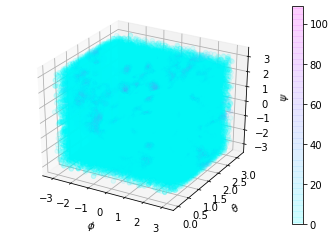

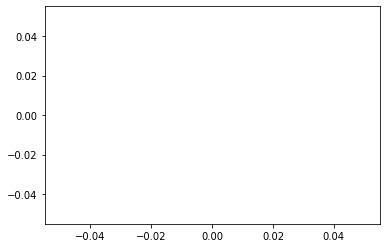

In [33]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
               num_imgs=num_imgs,
               snr=snr,
              #  results_folder=results_folder #?
               )
